# CAPSTONE PROJECT ON CREDIT CARD FRAUD DETECTION 

# About Dataset and understanding Data #

Context:
    
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Problem Statement 

Credit card fraud is a problem where some of the credit card transactions turn out to be fraud. Credit card companies would like to reduce the risks of fraud in order to reduce the costs associated. Our model's aim is to try to eliminate fraudulent transactions.

Next, we import libraries:

In [4]:

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 100.3/100.3 kB 2.9 MB/s eta 0:00:00


## Exploratory data analytics (EDA) #

In [9]:
#In order to read csv File from loval storage
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
data.shape

(284807, 31)

In [14]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
data.isnull().values.any()


False

In [17]:
#Check the fraud/Non_Fraud related records
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [22]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [24]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [25]:
data.isnull().sum() 


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [29]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [30]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
# find corelation
# correlation matrix
cor = data.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


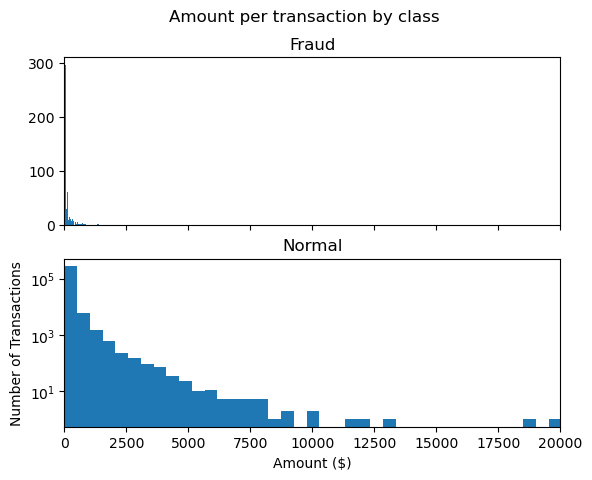

In [33]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

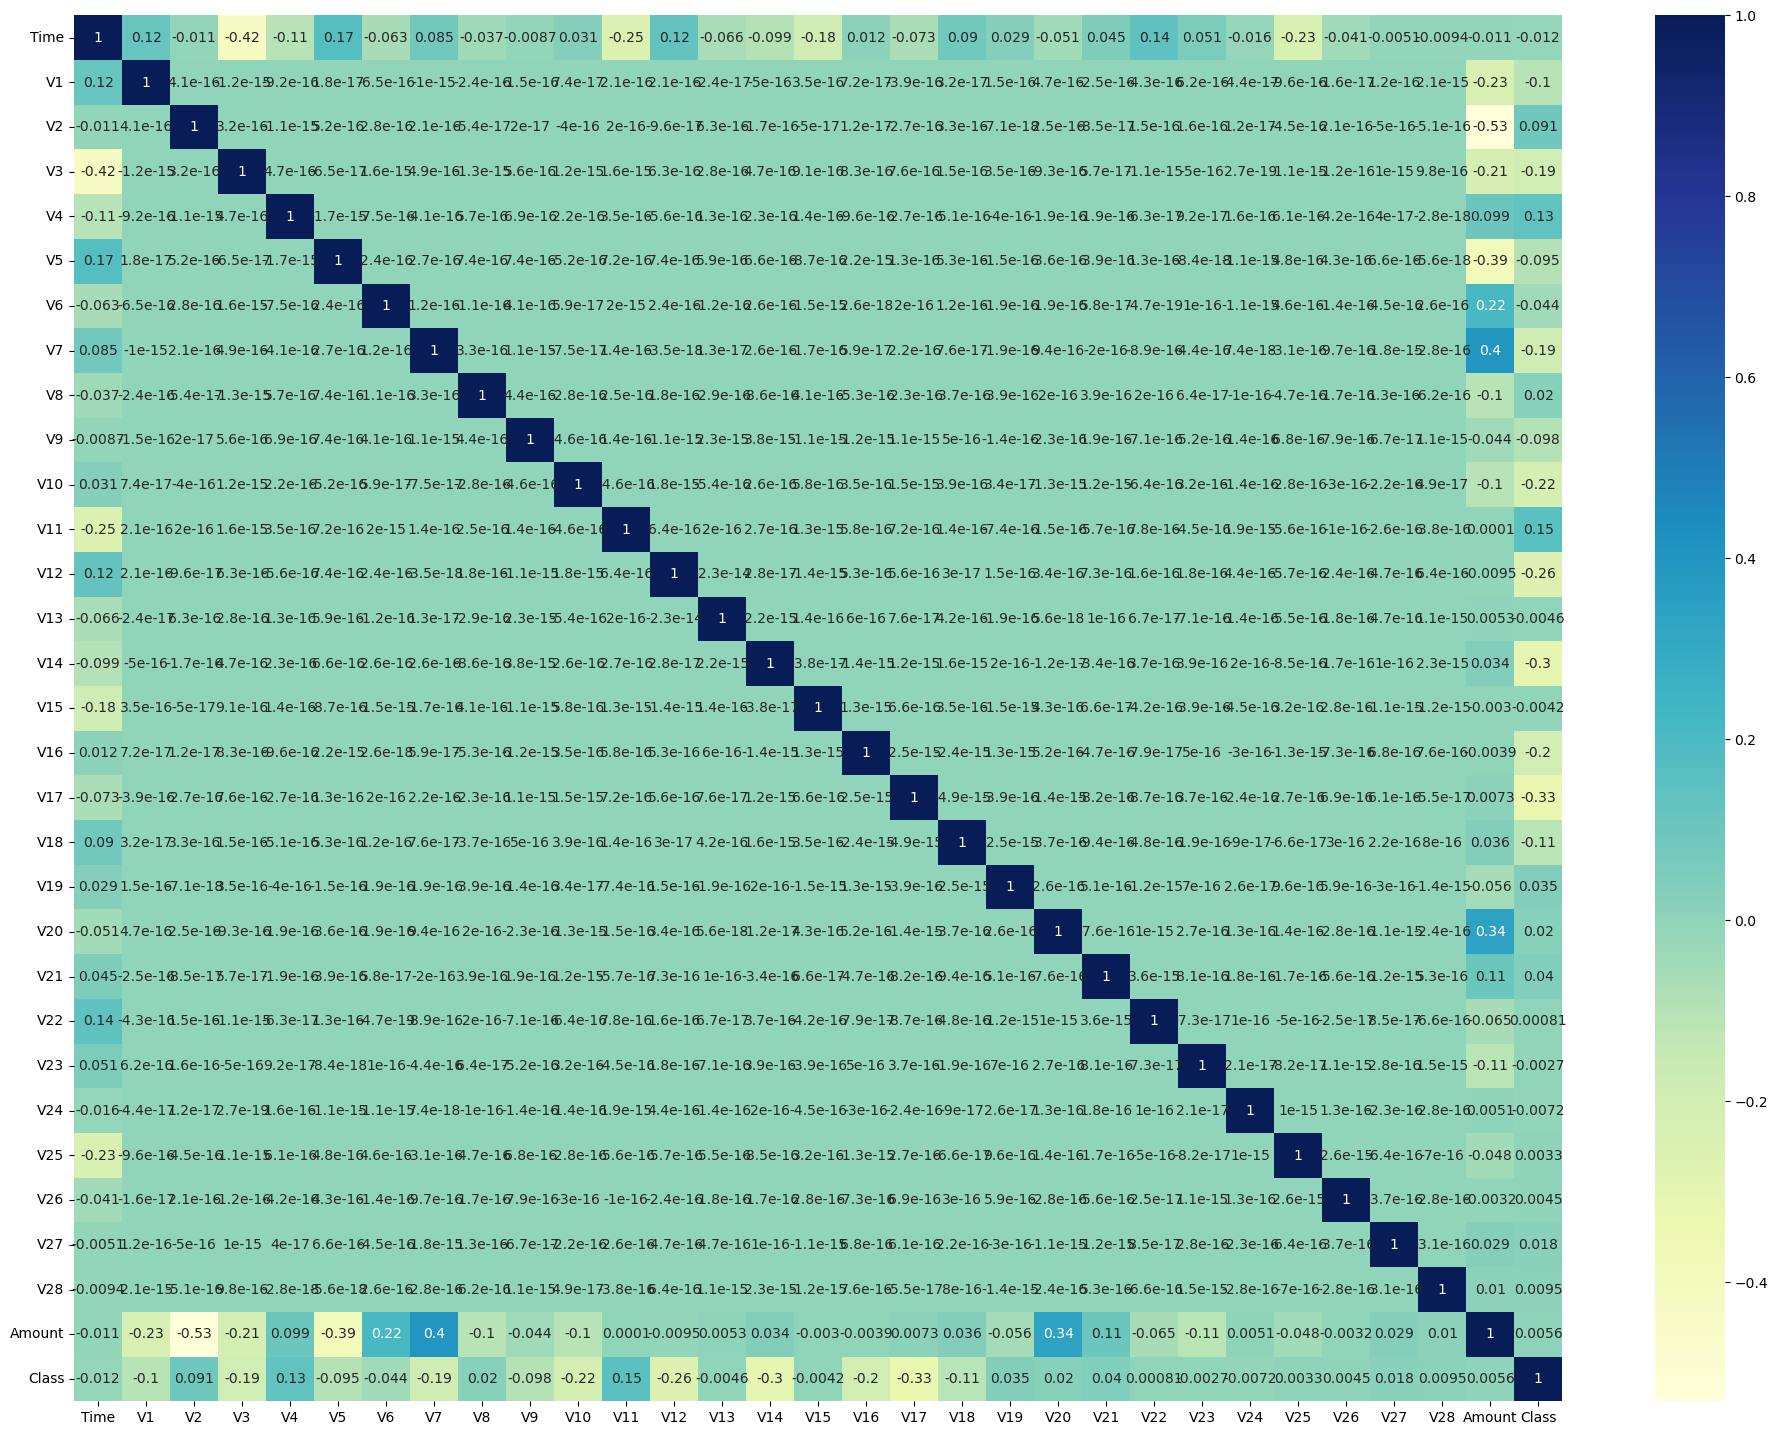

In [34]:
# Checking outputs through and heatmaps figure 

plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [36]:
# Lets check if there are fraud transactions
data1= data.sample(frac = 0.1,random_state=1)

data1.shape

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [37]:
data.shape

(284807, 31)

In [38]:
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [39]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [42]:
# To check classes of the data

classes=data['Class'].value_counts()
normal_share=classes[0]/data['Class'].count()*100
fraud_share=classes[1]/data['Class'].count()*100

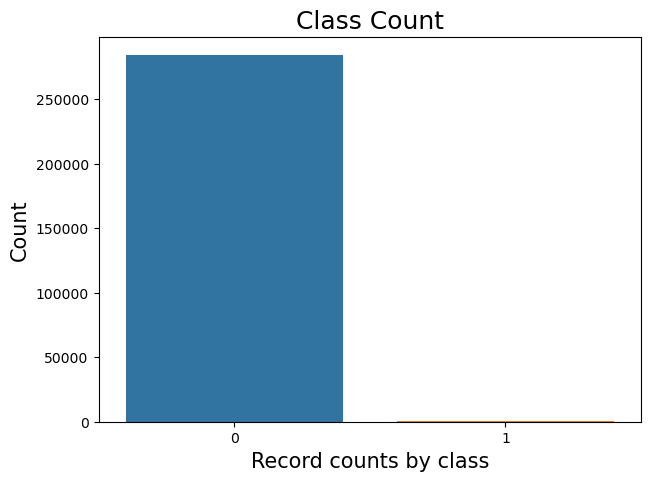

In [44]:
plt.figure(figsize=(7,5))
sns.countplot(data['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [45]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [57]:
# To locate values of fraud
#loc locates all data by column or conditional statement

frauds = data.loc[data['Class'] == 1] # find all rows that are fraudulent

non_frauds = data.loc[data['Class'] == 0] # final all rows that aren't fraudulent
print('Frauds ', len(frauds), ' transactions or ', round(data['Class'].value_counts()[0]/len(data)*100, 2), '% of the dataset')
print('No Fraud ', len(non_frauds), ' transactions or ', round(data['Class'].value_counts()[1]/len(data)*100, 2), '% of the dataset')


Frauds  492  transactions or  99.83 % of the dataset
No Fraud  284315  transactions or  0.17 % of the dataset


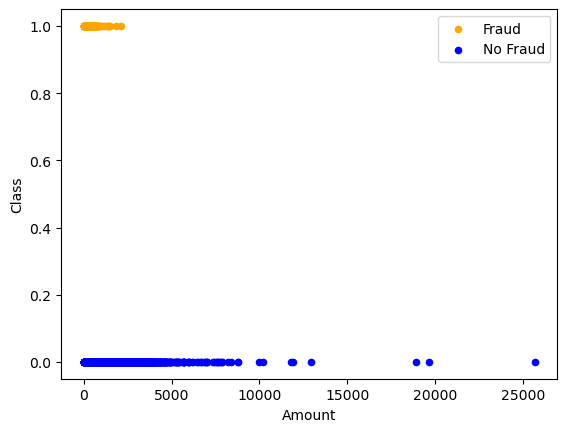

In [58]:
# Now we visualise data

ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='No Fraud', ax=ax)
plt.show()

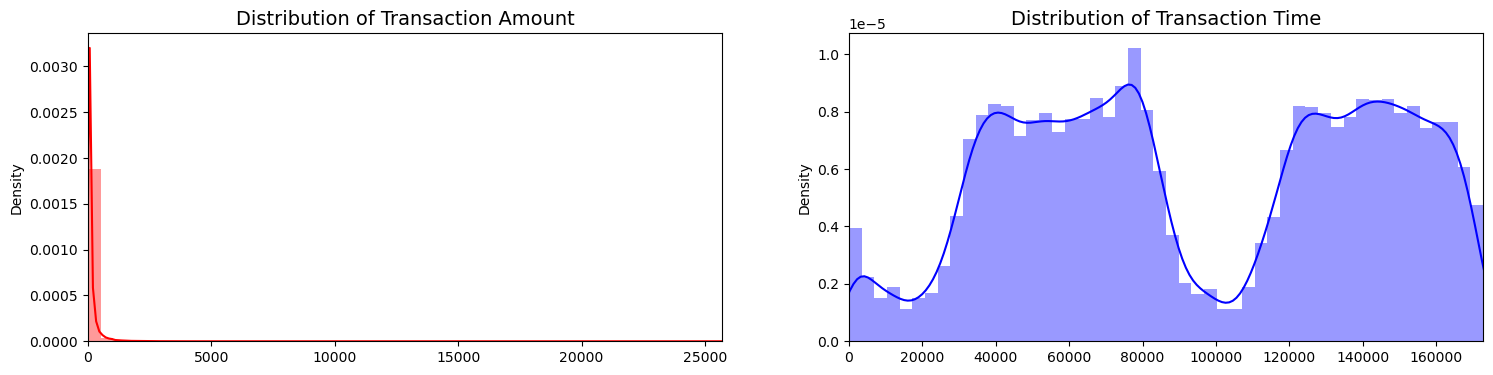

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [65]:
# Assignment of values

def replace_data_to_binary(x,y):
    data.Class.replace(x,y, inplace=True)

In [70]:
def Line_Separator():
    print('*'*50, '\n')
def Line_Separator1():
    print('*'*100, '\n')
def data_features (data):
    categorical_features = creditcard.select_dtypes(exclude = [np.number]).columns
    numerical_features = creditcard.select_dtypes(include = [np.number]).columns
    print("Categorical features in  creditcard file :\n",categorical_features);Line_Separator1()
    print("Numerical features in  creditcard file   :\n",numerical_features);Line_Separator1()
    

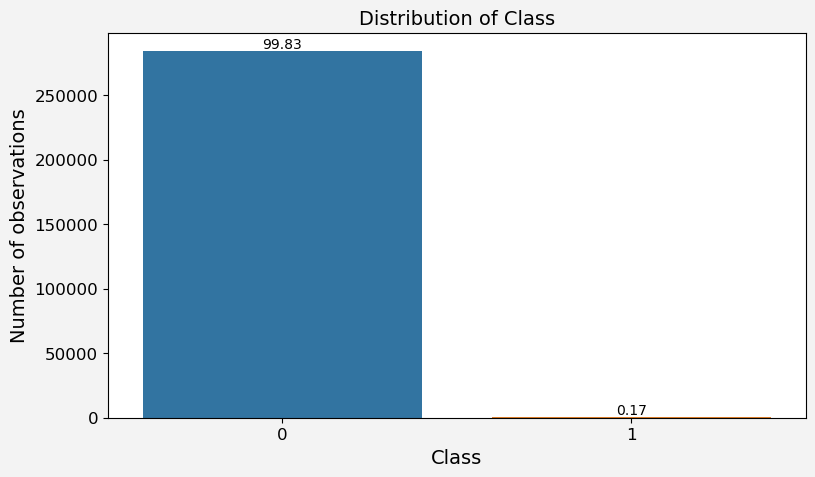

**************************************************************************************************** 



In [71]:

fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
total = float(len(data)) 
ax = sns.countplot(x="Class",  data=data)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distribution of Class', fontsize =14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(100*height/total), 
            ha="center",va='bottom')
ax.grid(False)
plt.tick_params(labelsize=12)
plt.show();Line_Separator1()


In [73]:
print("Review the Data Format in  data file :");Line_Separator()
print(data.dtypes);Line_Separator()

Review the Data Format in  data file :
************************************************** 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
************************************************** 



In [75]:
# Checking missing values
print("Check if there is any missing value in file :");Line_Separator()
print(round(100*(data.isnull()).sum()/len(data),2).sort_values(ascending=False));Line_Separator()

Check if there is any missing value in file :
************************************************** 

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64
************************************************** 



In [76]:
print("Time variable statistics");Line_Separator()
data['Time'].describe()

Time variable statistics
************************************************** 



count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [77]:
# Assignment of classes one and zero for visualization 

def replace_data_to_binary(x,y):
    data.Class.replace(x,y, inplace=True)
  

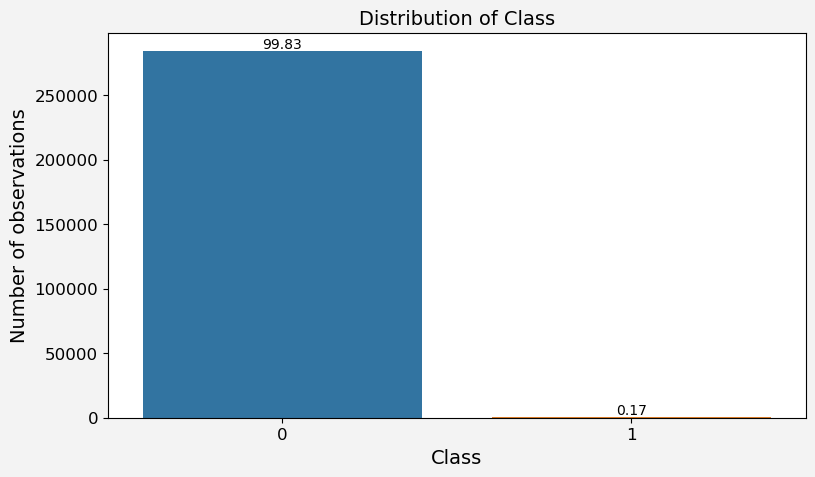

**************************************************************************************************** 



In [79]:
fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
total = float(len(data)) 
ax = sns.countplot(x="Class",  data=data)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distribution of Class', fontsize =14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(100*height/total), 
            ha="center",va='bottom')
ax.grid(False)
plt.tick_params(labelsize=12)
plt.show();Line_Separator1()

In [81]:
print("Amount details of  transaction :");Line_Separator()
print(data[data["Class"] == "Fraudulent"].Amount.describe());Line_Separator()

print('\n')

print("Amount details of non-fraudulent transaction :");Line_Separator()
print(data[data["Class"] == "Non Fraudulent"].Amount.describe());Line_Separator()

Amount details of  transaction :
************************************************** 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Amount, dtype: float64
************************************************** 



Amount details of non-fraudulent transaction :
************************************************** 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Amount, dtype: float64
************************************************** 



Evaluate the time vs. amount transaction between fraudulent and non-fraudulent
**************************************************************************************************** 



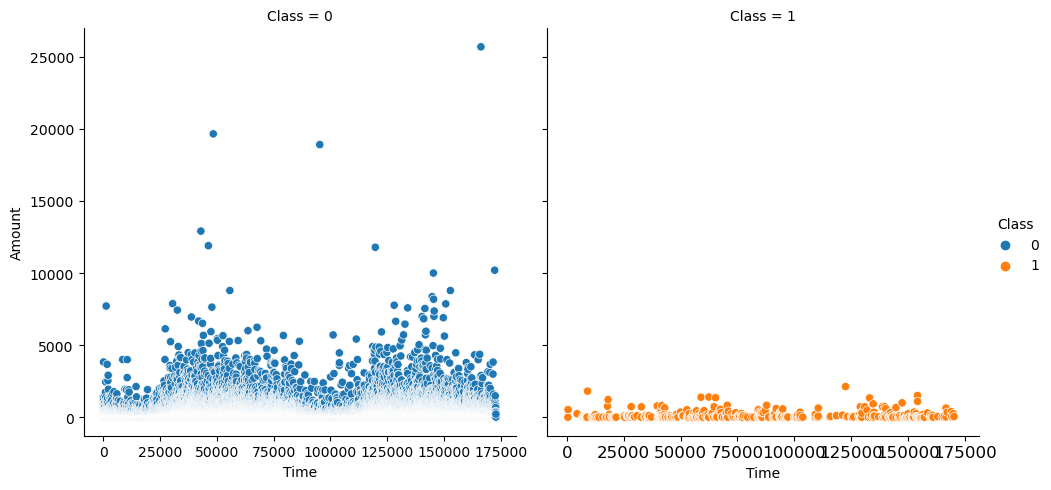

**************************************************************************************************** 



In [82]:
# Evaluate the time vs. amount transaction between fraudulent and non-fraudulent

print("Evaluate the time vs. amount transaction between fraudulent and non-fraudulent");Line_Separator1()
ax=sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=data)
plt.tick_params(labelsize=12)
plt.show(); Line_Separator1()

# Insights

In [83]:
#1. We see that fraud may have occured during the hours 2-8
#2. It shows fraud may have occured mostly in night

In [85]:
# Assign back to class one and zero for analysis
def replace_data_to_binary(x,y):
    data.Class.replace(x,y, inplace=True)
  
    
replace_data_to_binary('Non Fraudulent', 0)
replace_data_to_binary ('Fraudulent', 1)

In [86]:
print("After reassigning class to zero and one, we will evaluate the data type ");Line_Separator1()
data.dtypes

After reassigning class to zero and one, we will evaluate the data type 
**************************************************************************************************** 



Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

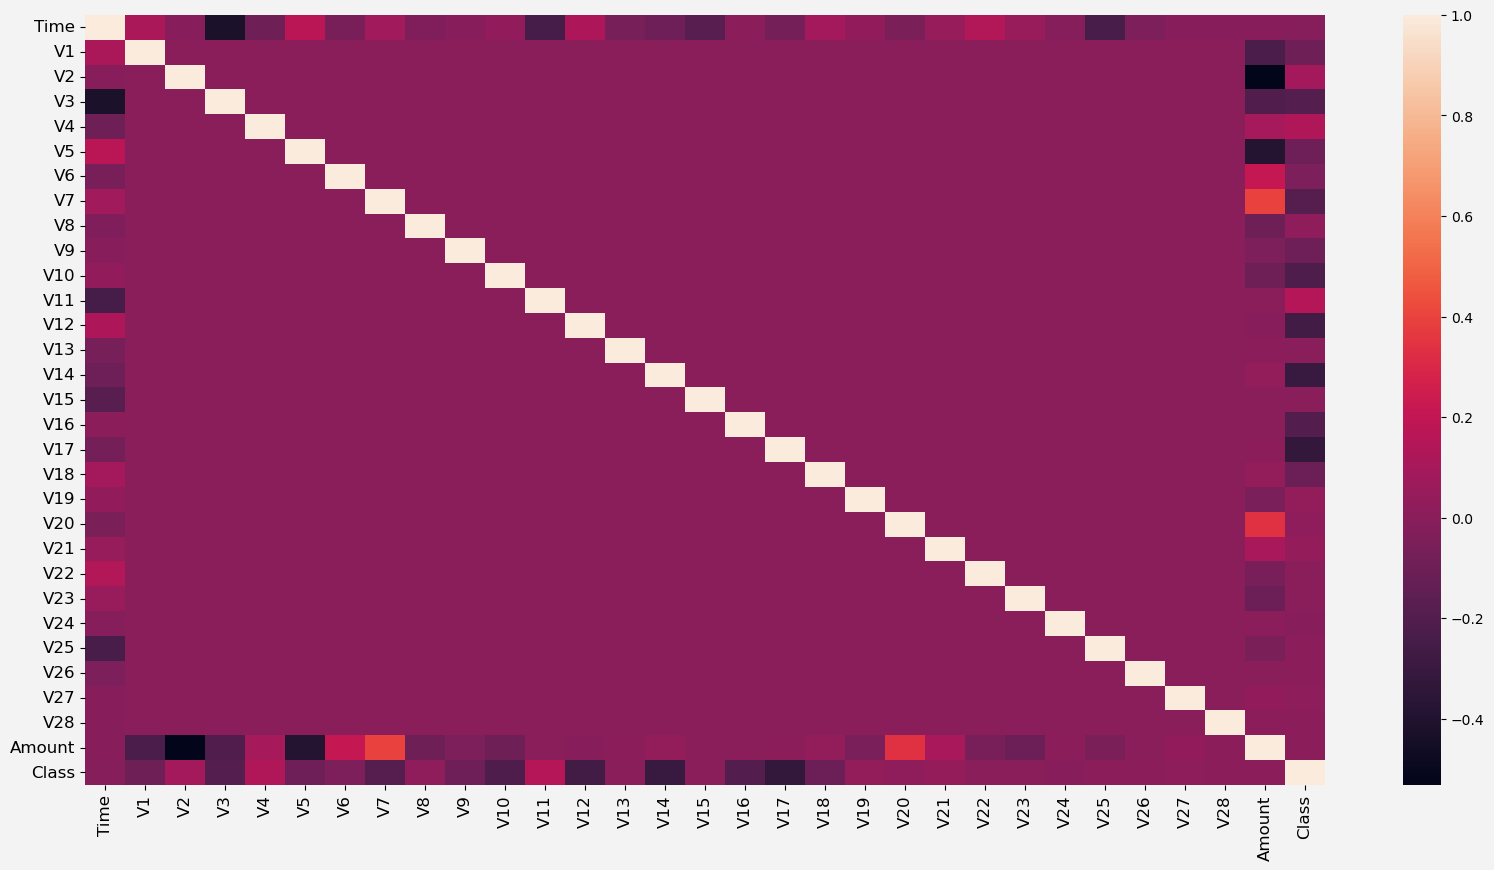

**************************************************************************************************** 



In [89]:
# Evaluate the correlation between different parameters in the dataset if any 

data_corr=data.corr()
fig = plt.figure(figsize=(20,10))
fig.set_facecolor("#F3F3F3")
ax=sns.heatmap(data_corr)
plt.tick_params(labelsize=12)
plt.show();Line_Separator1()


**************************************************************************************************** 

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12
**************************************************************************************************** 



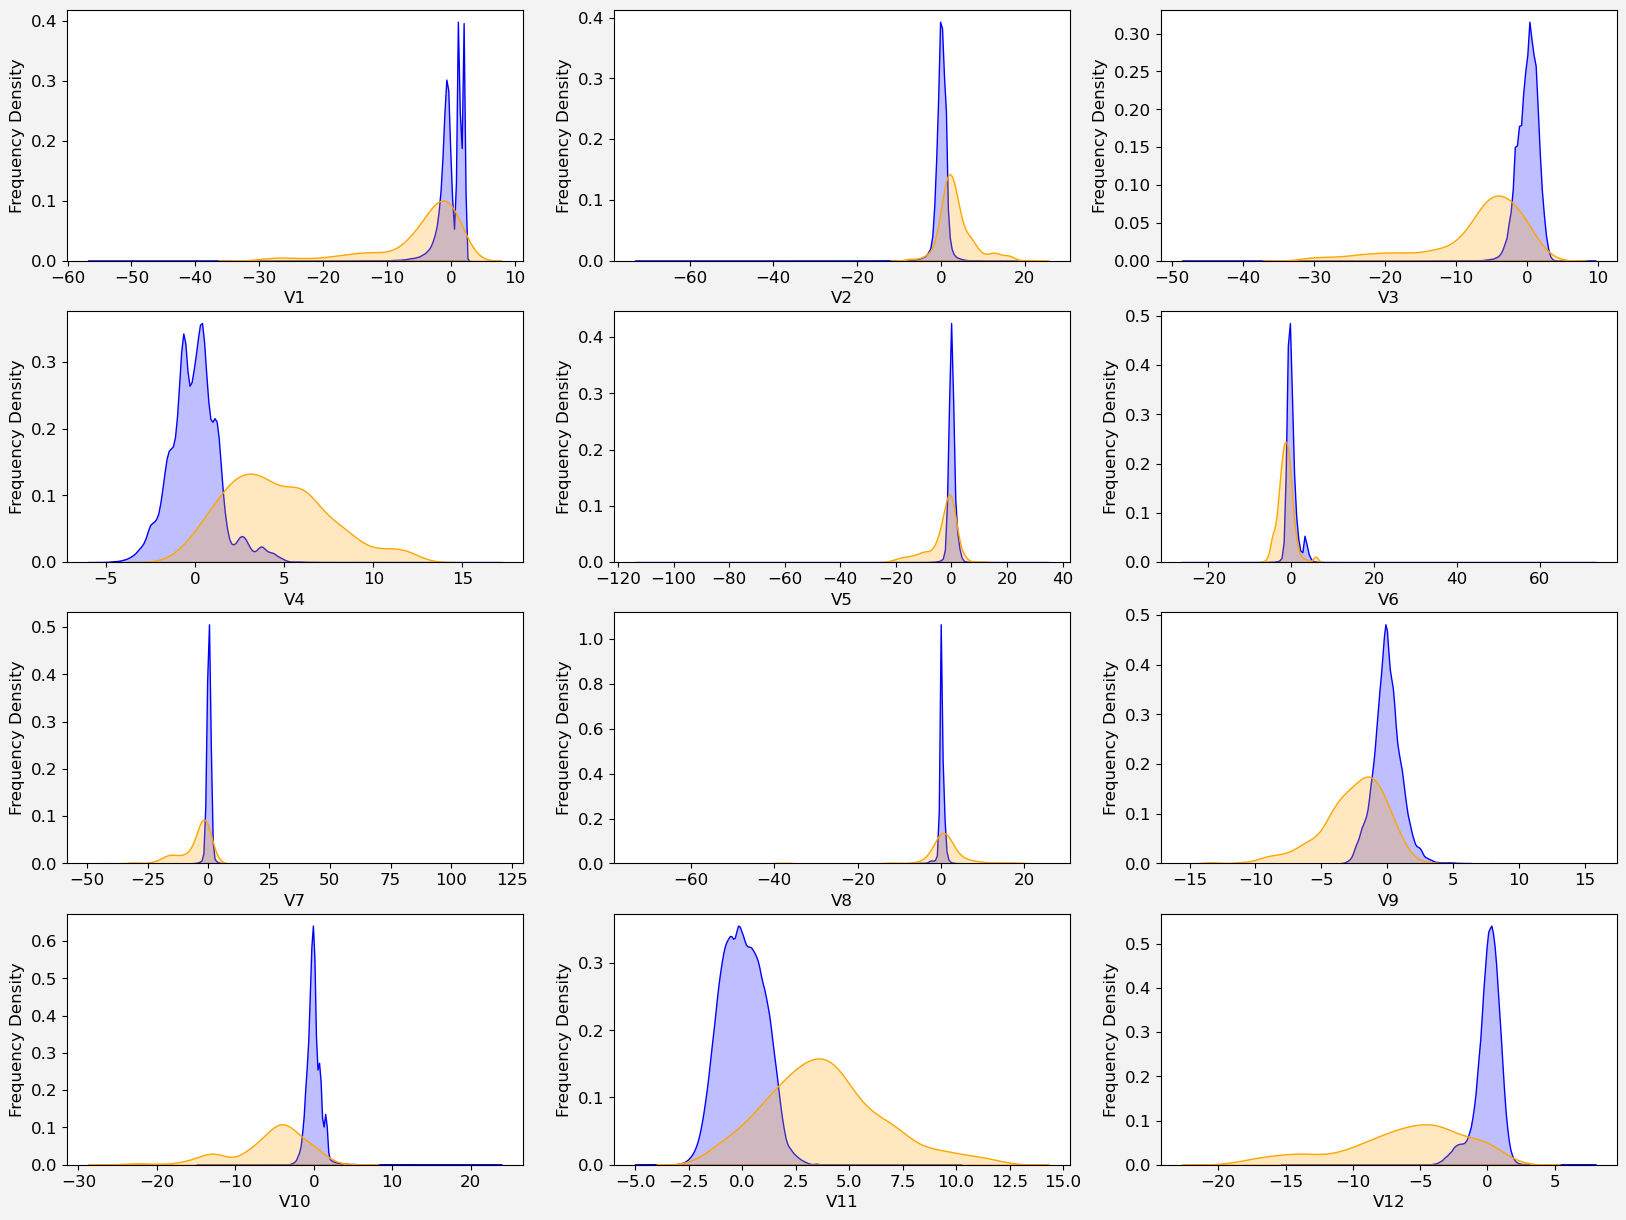

**************************************************************************************************** 



In [91]:
# Evaluate the data distributions of each variable

print(); Line_Separator1()
print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables V1 to V12"); Line_Separator1()
fig = plt.figure(figsize=(20,15))
fig.set_facecolor("#F3F3F3")

plt.subplot(431)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V1'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V1'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V1", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(432)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V2'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V2'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V2", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(433)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V3'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V3'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V3", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(434)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V4'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V4'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V4", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(435)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V5'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V5'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V5", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(436)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V6'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V6'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V6", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(437)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V7'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V7'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V7", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(438)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V8'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V8'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V8", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(439)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V9'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V9'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V9", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,10)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V10'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V10'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V10", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,11)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V11'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V11'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V11", fontsize=12)
plt.tick_params(labelsize=12)

plt.subplot(4,3,12)
g=sns.kdeplot(data.loc[(data["Class"] == 0),'V12'] , color='b',shade=True,label='Non Fraudulent')
g=sns.kdeplot(data.loc[(data['Class'] == 1),'V12'] , color='orange',shade=True, label='Fraudulent')
g.grid(False)
plt.ylabel("Frequency Density", fontsize=12)
plt.xlabel("V12", fontsize=12)
plt.tick_params(labelsize=12)

plt.show(); Line_Separator1()

In [94]:
# Non_Fraudulent = to check the skewness and kurtosis.

# Separate data of Non-Fraudulent and Fraudulent to check the skewness and kurtosis

Non_Fraudulent= data[data["Class"] == 0]
print ("Non_Fraudulent:", Non_Fraudulent.shape); Line_Separator()
Fraudulent= data[data["Class"] == 1]
print ("Fraudulent:", Fraudulent.shape); Line_Separator()

Non_Fraudulent: (284315, 31)
************************************************** 

Fraudulent: (492, 31)
************************************************** 



In [95]:
# Non_Fraudulent = to check the skewness and kurtosis.

print ("Non_Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:")
print("")
a = Non_Fraudulent.mean(axis = 0, skipna = True)
b = Non_Fraudulent.var(axis = 0, skipna = True)
c = Non_Fraudulent.skew(axis = 0, skipna = True)
d = Non_Fraudulent.kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

data_Non_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Non_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Non_Fraudulent=data_Non_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Non_Fraudulent); Line_Separator1()

Non_Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:

   Variables          Mean           Var   Skewness    kurtosis
0       Time  94838.202258  2.254732e+09  -0.036015   -1.293597
1         V1      0.008258  3.724182e+00  -3.130188   31.065568
2         V2     -0.006271  2.676974e+00  -4.887166   98.406211
3         V3      0.012171  2.129933e+00  -1.453676   14.545345
4         V4     -0.007860  1.958134e+00   0.581137    2.095716
5         V5      0.005453  1.841318e+00  -2.213903  217.852170
6         V6      0.002419  1.768669e+00   1.842604   42.987534
7         V7      0.009637  1.389598e+00   4.747800  452.920870
8         V8     -0.000987  1.348579e+00  -8.395492  209.772662
9         V9      0.004467  1.186731e+00   0.665635    3.196847
10       V10      0.009824  1.090361e+00   2.422278   21.961970
11       V11     -0.006576  1.006233e+00   0.145537    0.035641
12       V12      0.010832  8.948006e-01  -1.256301    5.300894
13       V13      0.000189  9.9015

In [96]:
# Fraudulent = to check the skewness and kurtosis

print ("Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:")
print("")
e = Fraudulent.mean(axis = 0, skipna = True)
f = Fraudulent.var(axis = 0, skipna = True)
g = Fraudulent.skew(axis = 0, skipna = True)
h = Fraudulent.kurtosis(axis = 0, skipna = True)

e.index = f.index
e.index = g.index
e.index = h.index

data_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Fraudulent=data_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Fraudulent); Line_Separator1()

Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:

   Variables          Mean           Var   Skewness    kurtosis
0       Time  94838.202258  2.254732e+09  -0.036015   -1.293597
1         V1      0.008258  3.724182e+00  -3.130188   31.065568
2         V2     -0.006271  2.676974e+00  -4.887166   98.406211
3         V3      0.012171  2.129933e+00  -1.453676   14.545345
4         V4     -0.007860  1.958134e+00   0.581137    2.095716
5         V5      0.005453  1.841318e+00  -2.213903  217.852170
6         V6      0.002419  1.768669e+00   1.842604   42.987534
7         V7      0.009637  1.389598e+00   4.747800  452.920870
8         V8     -0.000987  1.348579e+00  -8.395492  209.772662
9         V9      0.004467  1.186731e+00   0.665635    3.196847
10       V10      0.009824  1.090361e+00   2.422278   21.961970
11       V11     -0.006576  1.006233e+00   0.145537    0.035641
12       V12      0.010832  8.948006e-01  -1.256301    5.300894
13       V13      0.000189  9.901574e-

In [97]:
# Non-Fraudulent: Evaluate the number of positive skewness variables 

print('Non Fraudulent - Positive skewness:')
left_skewness_Non_Fraudulent= data_Non_Fraudulent[data_Non_Fraudulent.Skewness >0]
print(left_skewness_Non_Fraudulent['Variables'].unique());Line_Separator()


Non Fraudulent - Positive skewness:
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
************************************************** 



In [98]:
# Non-Fraudulent: Evaluate the number of negative skewness variables 
print('Non Fraudulent - Negative skewness:')
right_skewness_Non_Fraudulent= data_Non_Fraudulent[data_Non_Fraudulent.Skewness <0]
print(right_skewness_Non_Fraudulent['Variables'].unique());Line_Separator()
print('Fraudulent - Negative skewness:')
right_skewness_Fraudulent = data_Fraudulent[data_Fraudulent.Skewness <0]
print(right_skewness_Fraudulent['Variables'].unique());Line_Separator()

Non Fraudulent - Negative skewness:
['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']
************************************************** 

Fraudulent - Negative skewness:
['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']
************************************************** 



In [99]:
#Dropping time values

data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [100]:
from sklearn.preprocessing import StandardScaler

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1)) 

# Create X and Y variables
X = data.drop('Class',axis=1)
y = data['Class']


In [101]:
X.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475


In [102]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [103]:
# Split the data into train and test with 70-30 division 

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,  random_state=0)
X_train.shape,X_test.shape

((199364, 29), (85443, 29))

In [104]:
# Split the data into train and test with 70-30 division 

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,  random_state=0)
X_train.shape,X_test.shape

((199364, 29), (85443, 29))

In [109]:
data_nw= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
data_nw.fit(X_train)

X_train_nw = data_nw.transform(X_train)
X_test_nw = data_nw.transform(X_test)

y_train_nw = y_train

In [110]:
X_train = X_train_nw
X_test = X_test_nw

Test accuracy: 0.999

Test Precision: 0.872

Test Recall: 0.558

Test LogLoss: 0.031

Test AUPRC: 0.748


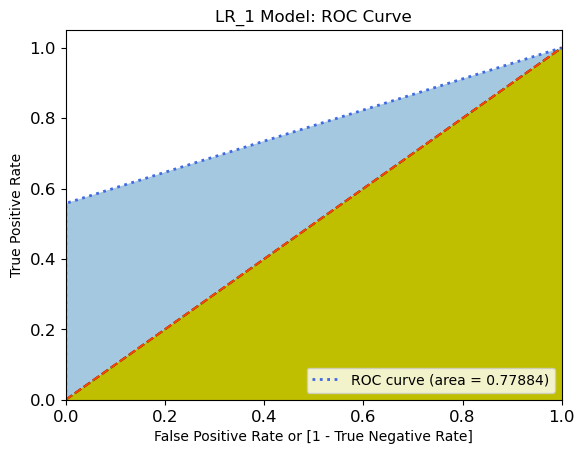

In [117]:
# C value which can be used shall be = 0.01 selected from the graph above
# Predict class label and probability for the validation data set
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve

lgreg = LogisticRegression(penalty='l1', C=0.01,solver='liblinear',random_state=0, n_jobs=-1, max_iter=1000).fit(X_train, y_train)
y_pred = lgreg.predict(X_test)
y_prob = lgreg.predict_proba(X_test)

    
# Compute classification metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
logloss = metrics.log_loss(y_test, y_pred)
    
# Compute precision, recall, and AUPRC for different levels of thresholds

precisions, recalls, thresholds = metrics.precision_recall_curve(y_test.ravel(), y_prob[:, 1].ravel(), pos_label=1)
prc_auc = metrics.average_precision_score(y_test, y_prob[:,1], average='weighted')

print('Test accuracy: %.3f' % (accuracy))
print('\nTest Precision: %.3f' % (precision))
print('\nTest Recall: %.3f' % (recall))
print('\nTest LogLoss: %.3f' % (logloss))
print('\nTest AUPRC: %.3f' % (prc_auc))


fpr,tpr,thresholds = roc_curve(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('LR_1 Model: ROC Curve', fontsize =12)
plt.legend(loc="lower right")
plt.tick_params(labelsize=12)
plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
plt.fill_between(fpr,tpr,alpha = .4)
plt.fill_between([0,1],[0,1],color = "y")

[Text(0, 0.5, 'Not Fraudulent'), Text(0, 1.5, 'Fraudulent')]

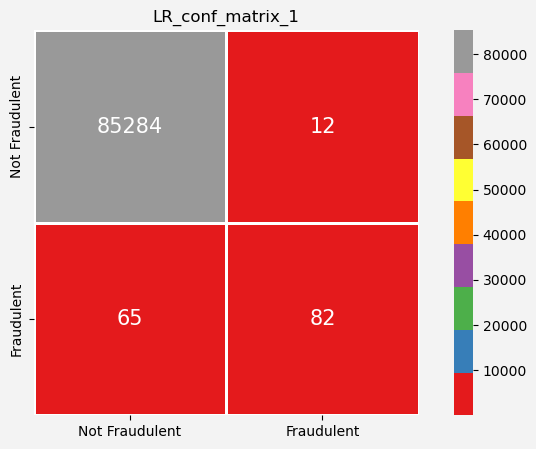

In [118]:
# Plotting the Confusion Matrix

classes = ['Not Fraudulent', 'Fraudulent']
LR_conf_matrix_1 = confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
ax= sns.heatmap(LR_conf_matrix_1,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                xticklabels=classes,
                yticklabels=classes,
                linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("LR_conf_matrix_1", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')

In [123]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
     -------------------------------------- 302.2/302.2 kB 6.2 MB/s eta 0:00:00


In [132]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [135]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
from xgboost import XGBClassifier



X_train_p = X_train_pt
y_train_p = y_train_pt
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

print("XGBOOST Classifier: --------------------------")
cv_score_mean=0
for n_estimators in [100,50]:
    for learning_rate in [0.2,0.6]:
        for subsample in [0.3, 0.6, 0.9]:
            print("n_estimators=",n_estimators,"learning_rate=",learning_rate, "subsample=",subsample)
            for train_index, test_index in skf.split(X_train_p, y_train_p):
                print("Train:", train_index, "Test:", test_index)
                X_train_cv, X_test_cv = X_train_p[train_index], X_train_p[test_index]
                y_train_cv, y_test_cv = y_train_p.iloc[train_index], y_train_p.iloc[test_index]

                ros = over_sampling.ADASYN(sampling_strategy='minority', random_state=42)
                X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

                xgboost_classifier= XGBClassifier(n_estimators=n_estimators,
                                                learning_rate=learning_rate,
                                                subsample=subsample, n_jobs=-1,
                                                eval_metric='logloss',
                                                use_label_encoder=False)
                xgboost_classifier.fit(X_ros_cv, y_ros_cv)

                y_test_pred= xgboost_classifier.predict_proba(X_test_cv)
                cv_score= metrics.roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
                cv_score_mean=cv_score_mean+cv_score
            print("Cross Val ROC-AUC Score=", cv_score_mean/3)

XGBOOST Classifier: --------------------------
n_estimators= 100 learning_rate= 0.2 subsample= 0.3
Train: [ 64311  64579  64989 ... 199361 199362 199363] Test: [    0     1     2 ... 66460 66461 66462]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 64311  64579  64989 ... 135239 135266 135333]
Train: [     0      1      2 ... 135239 135266 135333] Test: [132905 132906 132907 ... 199361 199362 199363]
Cross Val ROC-AUC Score= 0.9785768594129314
n_estimators= 100 learning_rate= 0.2 subsample= 0.6
Train: [ 64311  64579  64989 ... 199361 199362 199363] Test: [    0     1     2 ... 66460 66461 66462]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 64311  64579  64989 ... 135239 135266 135333]
Train: [     0      1      2 ... 135239 135266 135333] Test: [132905 132906 132907 ... 199361 199362 199363]
Cross Val ROC-AUC Score= 1.9568080187277854
n_estimators= 100 learning_rate= 0.2 subsample= 0.9
Train: [ 64311  64579  64989 ... 199361 199362 199363] Test: [    0

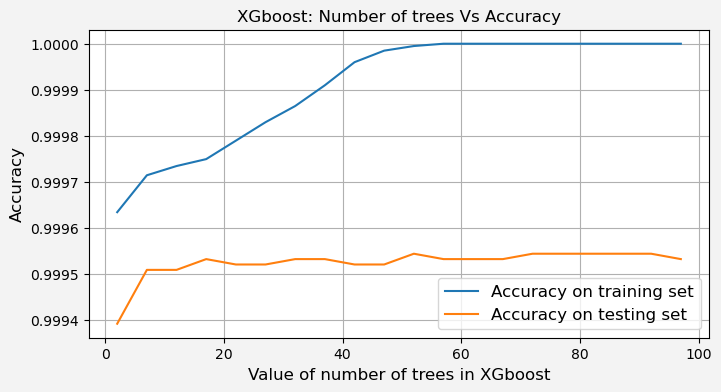

In [138]:
# Generate plot for - XGB to obtain the optimum value of trees to be used
# Finding the best tree in XGB

from xgboost import XGBClassifier

tree_range = range(2, 100, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,
                      eval_metric='mlogloss',
                      use_label_encoder=False)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))

%matplotlib inline
fig = plt.figure(figsize=(8,4))
fig.set_facecolor("#F3F3F3")
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.title('XGboost: Number of trees Vs Accuracy', fontsize =12)
plt.xlabel('Value of number of trees in XGboost', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(b=None)
plt.legend(loc = "best",
               prop = {"size" : 12})
plt.show()

In [139]:
# Using the optimized parameters for 

xgb=XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train,y_train)
print('Accuracy of XGB n=100 on the testing dataset is :{:.4f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB n=100 on the testing dataset is :0.9995


In [145]:
# testing various models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


model_summary = []
ML_models = {}
# ML_models = {}

model_index = ['LR','RF','NN', 'GRB', 'DT','KN', 'XGB']
model_sklearn = [LogisticRegression(penalty = 'l2', C = 1, random_state=0),
                 RandomForestClassifier(n_jobs=3, min_samples_split = 20, min_samples_leaf = 5, random_state=0),
                 MLPClassifier([100]*5,early_stopping=True,learning_rate='adaptive',random_state=0),
                 GradientBoostingClassifier(n_estimators = 50, max_depth = 2, random_state = 0),
                 DecisionTreeClassifier(random_state=42, max_depth=6),
                 KNeighborsClassifier(n_neighbors=7, n_jobs=-1),
                 XGBClassifier(n_estimators=100,learning_rate=0.2,subsample=0.3, n_jobs=-1,
                              eval_metric='mlogloss',use_label_encoder=False)]

In [146]:
# model_summary = []

for name,model in zip(model_index,model_sklearn):
    ML_models[name] = model.fit(X_train,y_train)
    preds = model.predict(X_
                          test)
    model_summary.append([name,f1_score(y_test,preds,average='weighted')
                          curacy_score(y_test,preds),
                          roc_auc_score(y_test,model.predict_proba(X_test)[:,1]), precision_score(y_test,preds, average='weighted'),
                         recall_score(y_test,preds, average='weighted')])

In [147]:
print(ML_models


{'LR': LogisticRegression(C=1, random_state=0), 'RF': RandomForestClassifier(min_samples_leaf=5, min_samples_split=20, n_jobs=3,
                       random_state=0), 'NN': MLPClassifier(early_stopping=True, hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='adaptive', random_state=0), 'GRB': GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=0), 'DT': DecisionTreeClassifier(max_depth=6, random_state=42), 'KN': KNeighborsClassifier(n_jobs=-1, n_neighbors=7), 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_ca

In [148]:
model_summary = pd.DataFrame(model_summary,columns=['Name','F1_score','Accuracy', 'AUC_ROC', 'Precision', 'Recall'])
model_summary = model_summary.reset_index()
display(model_summary)

,index,Name,F1_score,Accuracy,AUC_ROC,Precision,Recall
0,0,LR,0.999134,0.999204,0.978238,0.999144,0.999204
1,1,RF,0.999431,0.999462,0.957578,0.999438,0.999462
2,2,NN,0.999420,0.999450,0.956484,0.999424,0.999450
3,3,GRB,0.998214,0.998584,0.421688,0.998328,0.998584
4,4,DT,0.999453,0.999473,0.892079,0.999450,0.999473
5,5,KN,0.999316,0.999356,0.921605,0.999319,0.999356
6,6,XGB,0.999509,0.999532,0.970016,0.999514,0.999532


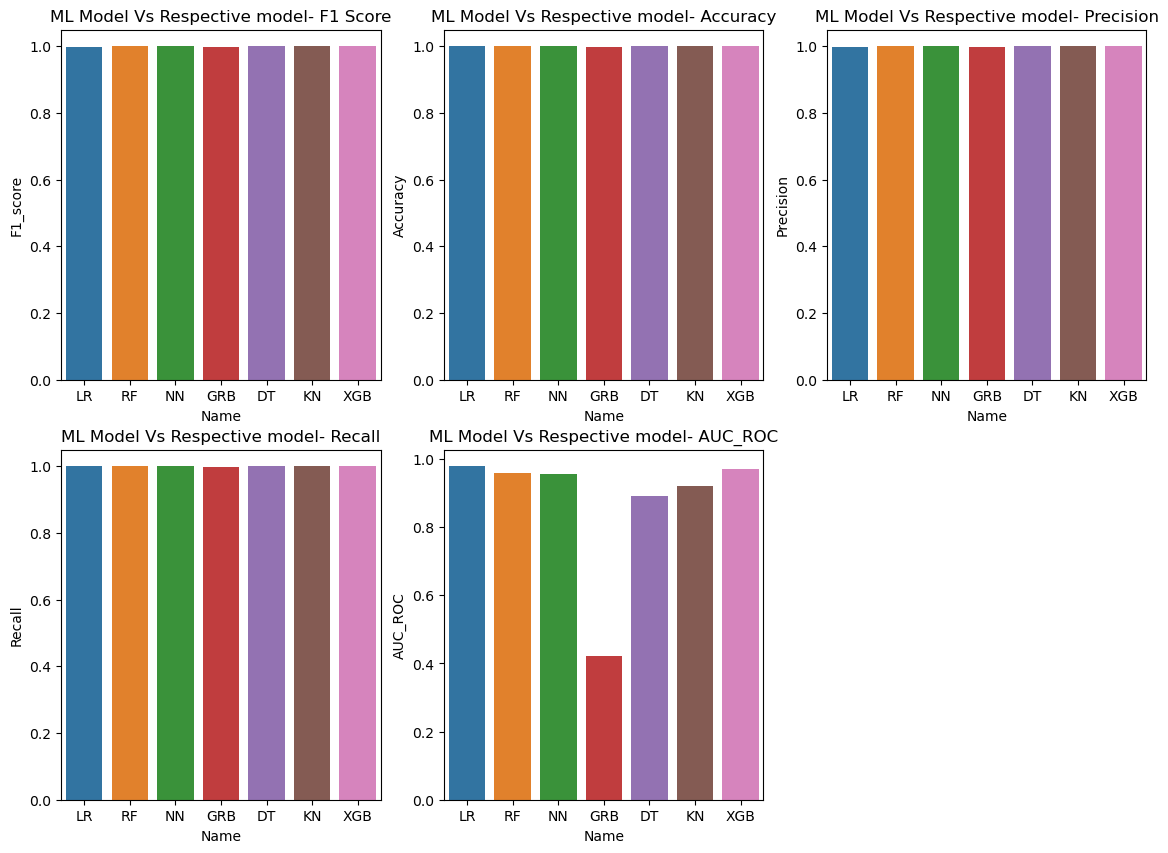

In [149]:

plt.rcParams['figure.figsize']=(14,10)
plt.subplot(231)
g=sns.barplot(data=model_summary, x="Name", y="F1_score")
plt.title('ML Model Vs Respective model- F1 Score')

plt.subplot(232)
g=sns.barplot(data=model_summary, x="Name", y="Accuracy")
plt.title('ML Model Vs Respective model- Accuracy')

plt.subplot(233)
g=sns.barplot(data=model_summary, x="Name", y="Precision")
plt.title('ML Model Vs Respective model- Precision')

plt.subplot(234)
g=sns.barplot(data=model_summary, x="Name", y="Recall")
plt.title('ML Model Vs Respective model- Recall')

plt.subplot(235)
g=sns.barplot(data=model_summary, x="Name", y="AUC_ROC")
plt.title('ML Model Vs Respective model- AUC_ROC')

plt.show()


Model building with balancing Classes
Perform class balancing with :
Random Oversampling
SMOTE
ADASYN

In [152]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    # Logistic Regression
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

In [155]:
# Verifying the validity of our different models

# LR Model

ML_test = ML_models['LR'].predict(X_test)
ML_train = ML_models['LR'].predict(X_train)
LR_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("LR model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(LR_Model_Residuals).value_counts())

# RF Model
ML_test = ML_models['RF'].predict(X_test)
ML_train = ML_models['RF'].predict(X_train)
RF_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("RF model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(RF_Model_Residuals).value_counts()); Line_Separator()


************************************************** 

LR model :- Number of values correctly predicted:
************************************************** 

True     227473
False       372
Name: Class, dtype: int64

************************************************** 

RF model :- Number of values correctly predicted:
************************************************** 

True     227732
False       113
Name: Class, dtype: int64
************************************************** 



In [156]:
# Verifying the validity of our different models

# LR Model

ML_test = ML_models['LR'].predict(X_test)
ML_train = ML_models['LR'].predict(X_train)
LR_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("LR model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(LR_Model_Residuals).value_counts())

# RF Model
ML_test = ML_models['RF'].predict(X_test)
ML_train = ML_models['RF'].predict(X_train)
RF_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("RF model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(RF_Model_Residuals).value_counts()); Line_Separator()


************************************************** 

LR model :- Number of values correctly predicted:
************************************************** 

True     227473
False       372
Name: Class, dtype: int64

************************************************** 

RF model :- Number of values correctly predicted:
************************************************** 

True     227732
False       113
Name: Class, dtype: int64
************************************************** 



Print the class distribution after applying SMOTE

In [159]:
# Verifying the validity of our different models

# LR Model

ML_test = ML_models['LR'].predict(X_test)
ML_train = ML_models['LR'].predict(X_train)
LR_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("LR model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(LR_Model_Residuals).value_counts())

# RF Model
ML_test = ML_models['RF'].predict(X_test)
ML_train = ML_models['RF'].predict(X_train)
RF_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("RF model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(RF_Model_Residuals).value_counts()); Line_Separator()


# NN Model
ML_test = ML_models['NN'].predict(X_test)
ML_train = ML_models['NN'].predict(X_train)
NN_Model_Residuals = y_train == ML_train

print ("NN model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(NN_Model_Residuals).value_counts()); Line_Separator()


# GRB Model
ML_test = ML_models['GRB'].predict(X_test)
ML_train = ML_models['GRB'].predict(X_train)
NN_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("GRB model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(NN_Model_Residuals).value_counts()); Line_Separator()


# DT Model
ML_test = ML_models['DT'].predict(X_test)
ML_train = ML_models['DT'].predict(X_train)
DT_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("DT model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(DT_Model_Residuals).value_counts()); Line_Separator()


# KN Model
ML_test = ML_models['KN'].predict(X_test)
ML_train = ML_models['KN'].predict(X_train)
KN_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("KN model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(KN_Model_Residuals).value_counts()); Line_Separator()

# XGB Model
ML_test = ML_models['XGB'].predict(X_test)
ML_train = ML_models['XGB'].predict(X_train)
XGB_Model_Residuals = y_train == ML_train

print(); Line_Separator()
print ("XGB model :- Number of values correctly predicted:"); Line_Separator()
print(pd.Series(XGB_Model_Residuals).value_counts()); Line_Separator()


************************************************** 

LR model :- Number of values correctly predicted:
************************************************** 

True     227473
False       372
Name: Class, dtype: int64

************************************************** 

RF model :- Number of values correctly predicted:
************************************************** 

True     227732
False       113
Name: Class, dtype: int64
************************************************** 

NN model :- Number of values correctly predicted:
************************************************** 

True     227748
False        97
Name: Class, dtype: int64
************************************************** 


************************************************** 

GRB model :- Number of values correctly predicted:
************************************************** 

True     227468
False       377
Name: Class, dtype: int64
************************************************** 


*********************************

MemoryError: Unable to allocate 256. MiB for an array with shape (673, 49841) and data type float64

In [160]:
# Classification report

target_names = ["Not Fraudulent","Fraudulent"]

# LR Model
print(); Line_Separator()
print ("                LR Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["LR"].predict(X_test))); Line_Separator()

#--------------------------------------------------------------------------------------------
# RF Model
print ("                RF Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["RF"].predict(X_test))); Line_Separator()

#--------------------------------------------------------------------------------------------
# NN Model
print ("                NN Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["NN"].predict(X_test))); Line_Separator()

#--------------------------------------------------------------------------------------------
# GRB Model
print ("                GRB Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["GRB"].predict(X_test))); Line_Separator()


#--------------------------------------------------------------------------------------------
# GRB Model
print ("                DT Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["DT"].predict(X_test))); Line_Separator()

#--------------------------------------------------------------------------------------------
# KN Model
print ("                KN Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["KN"].predict(X_test))); Line_Separator()


#--------------------------------------------------------------------------------------------
# XGB Model
print ("                XGB Model - Classification Report"); Line_Separator()
print(classification_report(y_test, ML_models["XGB"].predict(X_test))); Line_Separator()


************************************************** 

                LR Model - Classification Report
************************************************** 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.54      0.89      0.67        99

    accuracy                           1.00     56962
   macro avg       0.77      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962

************************************************** 

                RF Model - Classification Report
************************************************** 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.68      0.89      0.77        99

    accuracy                           1.00     56962
   macro avg       0.84      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

***********************************

MemoryError: Unable to allocate 1.00 GiB for an array with shape (673, 199364) and data type float64

In [161]:
# create speficity, sensitivity, FPR, positive predictive value and Negative predictive value

# LR model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['LR'].predict(X_test)).ravel()

print("            LR Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()

# ------------------------------------------------------------------------------------------------
# RF model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['RF'].predict(X_test)).ravel()

print("            RF Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('Positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()

#-----------------------------------------------------------------------------------------------------
# NN model
tn, fp, fn, tp  = confusion_matrix(y_test,ML_models['NN'].predict(X_test)).ravel()


print("            NN Model:")

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', tp / (tp+fn))
 
# Let us calculate specificity
print('Specificity               : ',tn /(tn+fp))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False postive rate        : ',fp/(tn+fp))

# positive predictive value 
print('Positive predictive value : ', tp / (tp+fp))

# Negative predictive value
print('Negative predictive value : ',tn / (tn+ fn)); Line_Separator()


            LR Model:
Sensitivity               :  0.8888888888888888
Specificity               :  0.9986986265233984
false postive rate        :  0.0013013734766016566
positive predictive value :  0.5432098765432098
Negative predictive value :  0.999806338028169
************************************************** 

            RF Model:
Sensitivity               :  0.8888888888888888
Specificity               :  0.9992789687494504
False postive rate        :  0.0007210312505495665
Positive predictive value :  0.6821705426356589
Negative predictive value :  0.9998064504777154
************************************************** 

            NN Model:
Sensitivity               :  0.8686868686868687
Specificity               :  0.9995603467984454
False postive rate        :  0.00043965320155461374
Positive predictive value :  0.7747747747747747
Negative predictive value :  0.9997713320785914
************************************************** 



MemoryError: Unable to allocate 256. MiB for an array with shape (673, 49841) and data type float64

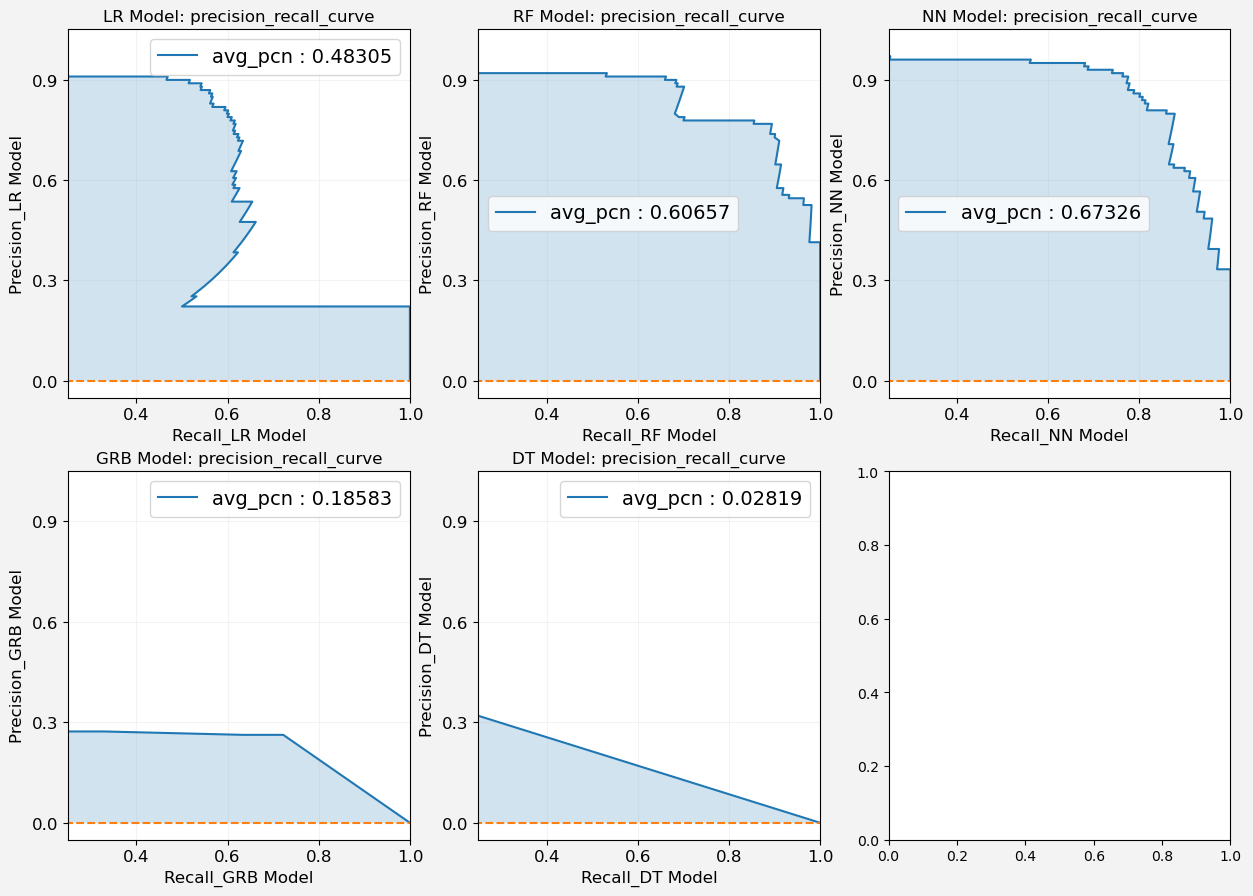

In [162]:
# Precision recall curves for all the models

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# LR_Model

fig = plt.figure(figsize=(15,22))
fig.set_facecolor("#F3F3F3")
plt.subplot(431)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['LR'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['LR'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'LR Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_LR Model",fontsize =12)
plt.ylabel("Precision_LR Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# RF_Model

plt.subplot(432)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['RF'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['RF'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'RF Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_RF Model",fontsize =12)
plt.ylabel("Precision_RF Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# NN_Model

plt.subplot(433)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['NN'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['NN'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'NN Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_NN Model",fontsize =12)
plt.ylabel("Precision_NN Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# GRB_Model

plt.subplot(434)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['GRB'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['GRB'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'GRB Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_GRB Model",fontsize =12)
plt.ylabel("Precision_GRB Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# DT_Model

plt.subplot(435)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['DT'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['DT'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'DT Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_DT Model",fontsize =12)
plt.ylabel("Precision_DT Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# KN_Model

plt.subplot(436)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['KN'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
            label = ("avg_pcn : " + 
                     str(np.around(average_precision_score(y_test,ML_models['KN'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'KN Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_KN Model",fontsize =12)
plt.ylabel("Precision_KN Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

#------------------------------------------------------------------------------------------------------
# XGB_Model

plt.subplot(437)

recall,precision,thresholds = precision_recall_curve(y_test,ML_models['XGB'].predict_proba(X_test)[:,1])
plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,ML_models['XGB'].predict(X_test)),5))))
plt.plot([0,1],[0,0],linestyle = "dashed")
plt.fill_between(recall,precision,alpha = .2)
plt.legend(loc = 'best',
               prop = {"size" : 14})
plt.grid(True,alpha = .15)
plt.title( 'XGB Model: precision_recall_curve', fontsize =12)
plt.xlabel("Recall_XGB Model",fontsize =12)
plt.ylabel("Precision_XGB Model",fontsize =12)
plt.xlim([0.25,1])
plt.yticks(np.arange(0,1,.3))
plt.tick_params(labelsize=12)

plt.show()


In [165]:
# convert df with label

df= pd.DataFrame(X_train)
df_X_train=df.rename(columns={ 0:'V1', 1:'V2', 2:'V3', 3: 'V4', 4: 'V5', 5: 'V6', 6: 'V7', 7: 'V8',
                              8: 'V9', 9: 'V10', 10: 'V11', 11: 'V12', 12: 'V13', 13: 'V14', 14: 'V15',15: 'V16',
                              16:'V17', 17: 'V18', 18: 'V19', 19: 'V20', 20: 'V21', 21: 'V22',22: 'V23', 23: 'V24',
                              24 :'V25', 25: 'V26', 26: 'V27', 27: 'V28', 28:'Amount'})

In [166]:
df_X_train.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
30473,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,-0.295417
30496,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,-7.833556,...,0.284555,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,0.093357
31002,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,0.093357
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.304013
39183,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,-1.965309,...,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,2.752604


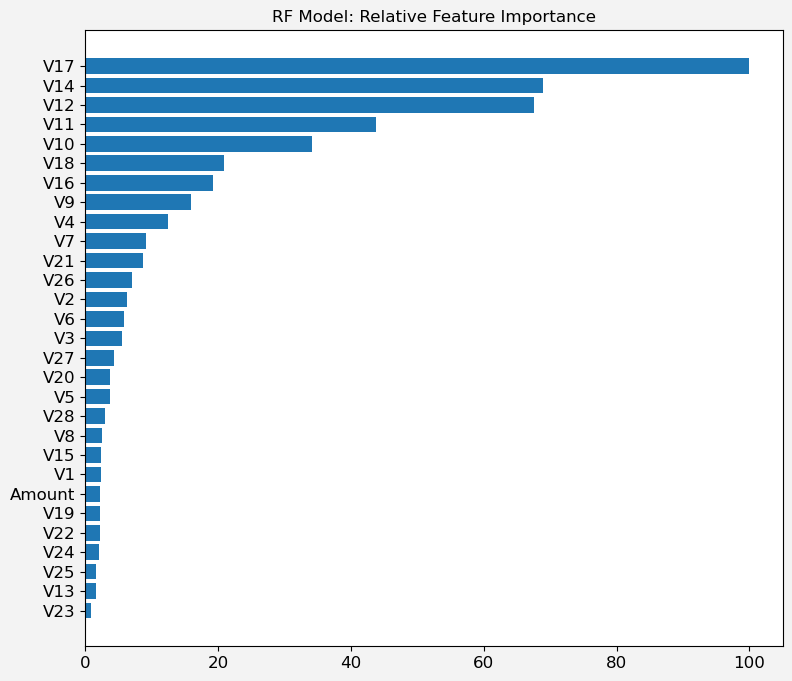

In [167]:
# variables important 
# Model - RF 

importances = ML_models['RF'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(df_X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5

# plot the result
fig = plt.figure(figsize=(9,8))
fig.set_facecolor("#F3F3F3")
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('RF Model: Relative Feature Importance', fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

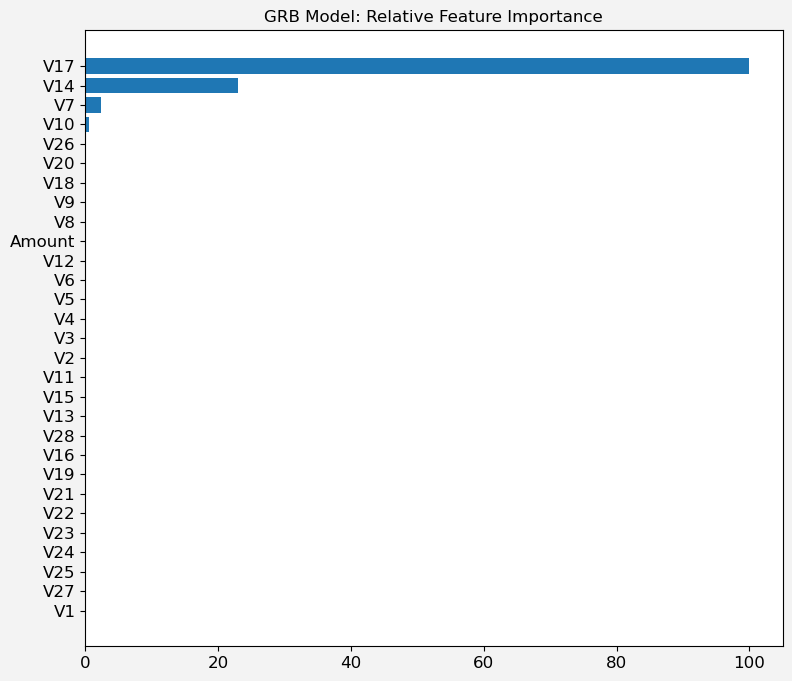

In [168]:
# variables important 
# Model - GRB

importances = ML_models['GRB'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(df_X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5

# plot the result
fig = plt.figure(figsize=(9,8))
fig.set_facecolor("#F3F3F3")
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('GRB Model: Relative Feature Importance', fontsize=12)
plt.tick_params(labelsize=12)

plt.show()


In [185]:
# convert df with label

df= pd.DataFrame(X_train)
df_X_train=df.rename(columns={ 0:'V1', 1:'V2', 2:'V3', 3: 'V4', 4: 'V5', 5: 'V6', 6: 'V7', 7: 'V8',
                              8: 'V9', 9: 'V10', 10: 'V11', 11: 'V12', 12: 'V13', 13: 'V14', 14: 'V15',15: 'V16',
                              16:'V17', 17: 'V18', 18: 'V19', 19: 'V20', 20: 'V21', 21: 'V22',22: 'V23', 23: 'V24',
                              24 :'V25', 25: 'V26', 26: 'V27', 27: 'V28', 28:'Amount'})
df_X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
30473,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,-0.295417
30496,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,-7.833556,...,0.284555,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,0.093357
31002,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,-7.502112,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,0.093357
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.304013
39183,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,-1.965309,...,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,2.752604


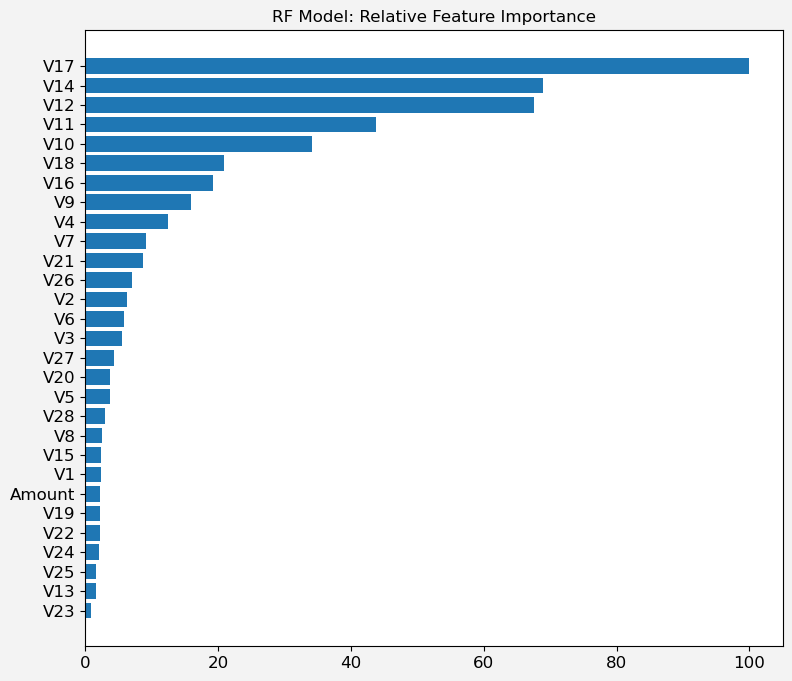

In [186]:
# variables important 
# Model - RF 

importances = ML_models['RF'].feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(df_X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5

# plot the result
fig = plt.figure(figsize=(9,8))
fig.set_facecolor("#F3F3F3")
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('RF Model: Relative Feature Importance', fontsize=12)
plt.tick_params(labelsize=12)
plt.show()


In [190]:
# Confusion matrix for LR, RF, NN, GRB, DT, KN, XGB models after incorporating cutoff target value of each model

# LR model 

TP_LR = LR_conf_matrix[1,1] # true positive 
TN_LR = LR_conf_matrix[0,0] # true negatives
FP_LR = LR_conf_matrix[0,1] # false positives
FN_LR = LR_conf_matrix[1,0] # false negatives

In [191]:
print();Line_Separator()

# LR model statistics-----------------------------------------------------------
print("LR Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity / Recall      : ', TP_LR / float(TP_LR+FN_LR))
 
# Let us calculate specificity
print('Specificity / Precision   : ',TN_LR / float(TN_LR+FP_LR))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_LR/ float(TN_LR+FP_LR))

# positive predictive value 
print('Positive predictive value : ', TP_LR / float(TP_LR+FP_LR))

# Negative predictive value
print('Negative predictive value : ', TN_LR / float(TN_LR+ FN_LR))

# F1 Score

LR_Precision  = TP_LR/float(TP_LR + FP_LR)
LR_recall     = TP_LR/float(TP_LR + FN_LR)
LR_F1_Score      = 2*((LR_Precision*LR_recall)/(LR_Precision+LR_recall))
print ('F1 Score                  : ',  LR_F1_Score)

# Accuracy 

LR_Accuracy  = (TP_LR + TN_LR)/ float(TP_LR+TN_LR+FP_LR+FN_LR)
print ('Accuracy                  : ',  LR_Accuracy);Line_Separator()



# RF model statistics -------------------------------------------------------------

print("RF Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_RF / float(TP_RF+FN_RF))
 
# Let us calculate specificity
print('Specificity               : ',TN_RF / float(TN_RF+FP_RF))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_RF/ float(TN_RF+FP_RF))

# positive predictive value 
print('Positive predictive value : ', TP_RF / float(TP_RF+FP_RF))

# Negative predictive value
print('Negative predictive value : ',TN_RF / float(TN_RF+ FN_RF))

# F1 Score

RF_Precision  = TP_RF/float(TP_RF + FP_RF)
RF_recall     = TP_LR/float(TP_RF + FN_RF)
RF_F1_Score      = 2*((RF_Precision*RF_recall)/(RF_Precision+RF_recall))
print ('F1 Score                  : ',  RF_F1_Score)

# Accuracy 

RF_Accuracy  = (TP_RF + TN_RF)/ float(TP_RF+TN_RF+FP_RF+FN_RF)
print ('Accuracy                  : ',  RF_Accuracy);Line_Separator()


# NN model statistics -------------------------------------------------------------

print("NN Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_NN / float(TP_NN+FN_NN))
 
# Let us calculate specificity
print('Specificity               : ',TN_NN / float(TN_NN+FP_NN))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_NN/ float(TN_NN+FP_NN))

# positive predictive value 
print('Positive predictive value : ', TP_NN / float(TP_NN+FP_NN))

# Negative predictive value
print('Negative predictive value : ', TN_NN / float(TN_NN+ FN_NN))

# F1 Score

NN_Precision  = TP_NN/float(TP_NN + FP_NN)
NN_recall     = TP_NN/float(TP_NN + FN_NN)
NN_F1_Score      = 2*((NN_Precision*NN_recall)/(NN_Precision+NN_recall))
print ('F1 Score                  : ',  NN_F1_Score)

# Accuracy 

NN_Accuracy  = (TP_NN + TN_NN)/ float(TP_NN+TN_NN+FP_NN+FN_NN)
print ('Accuracy                  : ',  NN_Accuracy);Line_Separator()

# GRB model statistics -------------------------------------------------------------

print("GRB Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_GRB / float(TP_GRB+FN_GRB))
 
# Let us calculate specificity
print('Specificity               : ',TN_GRB / float(TN_GRB+FP_GRB))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_GRB/ float(TN_GRB+FP_GRB))

# positive predictive value 
print('Positive predictive value : ', TP_GRB / float(TP_GRB+FP_GRB))

# Negative predictive value
print('Negative predictive value : ', TN_GRB / float(TN_GRB+ FN_GRB))

# F1 Score

GRB_Precision  = TP_GRB/float(TP_GRB + FP_GRB)
GRB_recall     = TP_GRB/float(TP_GRB + FN_GRB)
GRB_F1_Score      = 2*((GRB_Precision*GRB_recall)/(GRB_Precision+GRB_recall))
print ('F1 Score                  : ',  GRB_F1_Score)

# Accuracy 

GRB_Accuracy  = (TP_GRB + TN_GRB)/ float(TP_GRB+TN_GRB+FP_GRB+FN_GRB)
print ('Accuracy                  : ',  GRB_Accuracy);Line_Separator()

# DT model statistics -------------------------------------------------------------

print("DT Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_DT / float(TP_DT+FN_DT))
 
# Let us calculate specificity
print('Specificity               : ',TN_DT / float(TN_DT+FP_DT))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_DT/ float(TN_DT+FP_DT))

# positive predictive value 
print('Positive predictive value : ', TP_DT / float(TP_DT+FP_DT))

# Negative predictive value
print('Negative predictive value : ', TN_DT / float(TN_DT+ FN_DT))

# F1 Score

DT_Precision  = TP_DT/float(TP_DT + FP_DT)
DT_recall     = TP_DT/float(TP_DT + FN_DT)
DT_F1_Score      = 2*((DT_Precision*DT_recall)/(DT_Precision+DT_recall))
print ('F1 Score                  : ',  DT_F1_Score)

# Accuracy 

DT_Accuracy  = (TP_DT + TN_DT)/ float(TP_DT+TN_DT+FP_DT+FN_DT)
print ('Accuracy                  : ',  DT_Accuracy);Line_Separator()

# KN model statistics -------------------------------------------------------------

print("KN Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_KN / float(TP_KN+FN_KN))
 
# Let us calculate specificity
print('Specificity               : ',TN_KN / float(TN_KN+FP_KN))

# Calculate false postive rate - predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_KN/ float(TN_KN+FP_KN))

# positive predictive value 
print('Positive predictive value : ', TP_KN / float(TP_KN+FP_KN))

# Negative predictive value
print('Negative predictive value : ',TN_KN / float(TN_KN+ FN_KN))

# F1 Score

KN_Precision  = TP_KN/float(TP_KN + FP_KN)
KN_recall     = TP_KN/float(TP_KN + FN_KN)
KN_F1_Score      = 2*((KN_Precision*KN_recall)/(KN_Precision+KN_recall))
print ('F1 Score                  : ',  KN_F1_Score)

# Accuracy 

KN_Accuracy  = (TP_KN + TN_KN)/ float(TP_KN+TN_KN+FP_KN+FN_KN)
print ('Accuracy                  : ', KN_Accuracy);Line_Separator()

# XGB model statistics -------------------------------------------------------------

print("XGB Model :");Line_Separator()

# Let's see the sensitivity of our logistic regression model
print('Sensitivity               : ', TP_XGB / float(TP_XGB+FN_XGB))
 
# Let us calculate specificity
print('Specificity               : ',TN_XGB / float(TN_XGB+FP_XGB))

# Calculate false postive rate -predicting Fraudulent when does not have Fraudulent
print('False postive rate        : ',FP_XGB/ float(TN_XGB+FP_XGB))

# positive predictive value 
print('Positive predictive value : ', TP_XGB / float(TP_XGB+FP_XGB))

# Negative predictive value
print('Negative predictive value : ',TN_XGB / float(TN_XGB+ FN_XGB))

# F1 Score

XGB_Precision  = TP_XGB/float(TP_XGB + FP_XGB)
XGB_recall     = TP_XGB/float(TP_XGB + FN_XGB)
XGB_F1_Score      = 2*((XGB_Precision*XGB_recall)/(XGB_Precision+XGB_recall))
print ('F1 Score                  : ',  XGB_F1_Score)

# Accuracy 

XGB_Accuracy  = (TP_XGB + TN_XGB)/ float(TP_XGB+TN_XGB+FP_XGB+FN_XGB)
print ('Accuracy                  : ',  XGB_Accuracy);Line_Separator()


************************************************** 

LR Model :
************************************************** 

Sensitivity / Recall      :  0.8686868686868687
Specificity / Precision   :  0.9987689710356471
False postive rate        :  0.0012310289643529184
Positive predictive value :  0.5512820512820513
Negative predictive value :  0.9997711509347604
F1 Score                  :  0.6745098039215687
Accuracy                  :  0.9985428882412837
************************************************** 

RF Model :
************************************************** 



NameError: name 'TP_RF' is not defined